<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/Series_Temporais_Banco_do_Brasil_S_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando os dados
!pip install pandas-datareader yfinance pandas numpy matplotlib
!pip install statsmodels

In [ ]:
# importando dados do yahoo
import pandas as pd
import numpy as np
import pandas_datareader.data as pdr
import yfinance
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats import diagnostic as diag
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot


In [ ]:
#ajustar o pandas-datareader utilizando a biblioteca yfinance para corrigir os bugs
yfinance.pdr_override()

In [ ]:
ativos = ['BBAS3.SA']

In [ ]:
data_inicial = "2021-12-15"
data_final = "2023-12-15"

tabela_cotacoes = pdr.get_data_yahoo("BBAS3.SA", data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
Preco_fechamento = tabela_cotacoes["Close"]
# Retira dados faltantes
Preco_fechamento = Preco_fechamento.dropna()
Preco_fechamento = pd.DataFrame(Preco_fechamento).reset_index()

In [ ]:
Preco_fechamento.head()

,Date,Close
0,2021-12-15,31.51
1,2021-12-16,31.41
2,2021-12-17,30.33
3,2021-12-20,29.42
4,2021-12-21,29.50


In [ ]:
#Converter DATE para datetime e associar ao index do dateframe
Preco_fechamento.index = pd.to_datetime(Preco_fechamento.Date,format = "%Y-%m-%d")

#eliminar a coluna DATE, pois ela já seria o indice
Preco_fechamento.drop("Date", inplace=True, axis=1)

In [ ]:
Preco_fechamento.head()

,Close
Date,
2021-12-15,31.51
2021-12-16,31.41
2021-12-17,30.33
2021-12-20,29.42
2021-12-21,29.50


In [ ]:
Preco_fechamento.tail()

,Close
Date,
2023-12-08,54.450001
2023-12-11,54.439999
2023-12-12,52.500000
2023-12-13,52.980000
2023-12-14,53.330002


<Axes: title={'center': 'Preço diário de fechamento Banco do Brasil'}, xlabel='Data'>

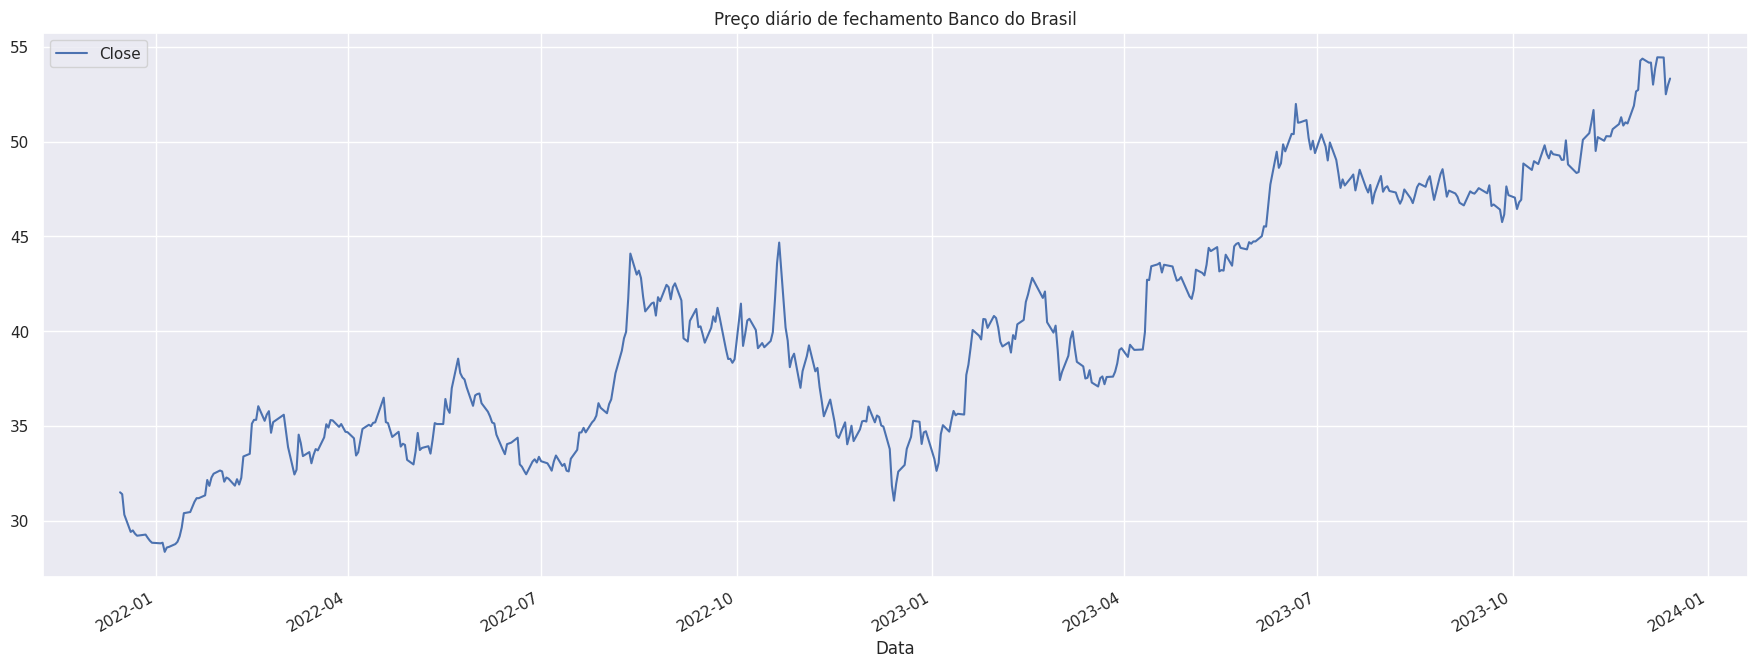

In [ ]:
# Plota os preços de fechamento
sns.set()
Preco_fechamento.plot(title = "Preço diário de fechamento Banco do Brasil",subplots = False, figsize = (22, 8),xlabel='Data')

In [ ]:
seasonal_decompose(Preco_fechamento,period=24)

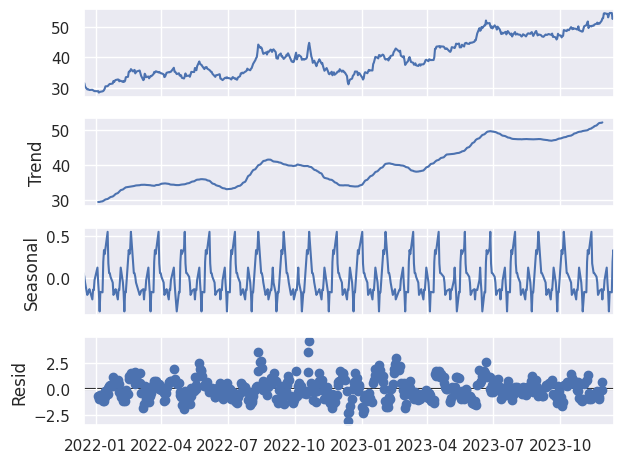

In [ ]:
## plotando a decomposição da série

#Salvar a decoposição em result

resultado = seasonal_decompose(Preco_fechamento,period=24,model='additive')

# plot

resultado.plot()
pyplot.show()

**Tendência**

Tendência é a direção geral de onde alguma coisa está evoluindo ao decorrer do tempo. Pode ser crescente ou decrescente.

**Sazonalidade**

São oscilações que podem ser recorrente ou se repetem em um determinado período de tempo específico


Os plots gerados pela biblioteca statsmodels foram:

1. Observação original
2. Tendência
3. Sazonalidade
4. Residual

Aquilo que não foi identificado ou separado da observação original é o ruído, chamado aqui de residual.

fonte: https://maxwellpaparelli.medium.com/time-series-s%C3%A9ries-temporais-com-python-f4e74fd45b0b

In [ ]:
## verificando o preço dos retornos
n = len(Preco_fechamento)

# Calcula os retornos
retornos = Preco_fechamento/Preco_fechamento.shift(1)-1

# Retira os dados faltantes
retornos = retornos.dropna()

# Calcula a média (retorno esperado)
mi = retornos.mean()

# Calcula a variancia
variancia = retornos.var()


Média : 0.0012252494141111612
variancia : 0.0012252494141111612


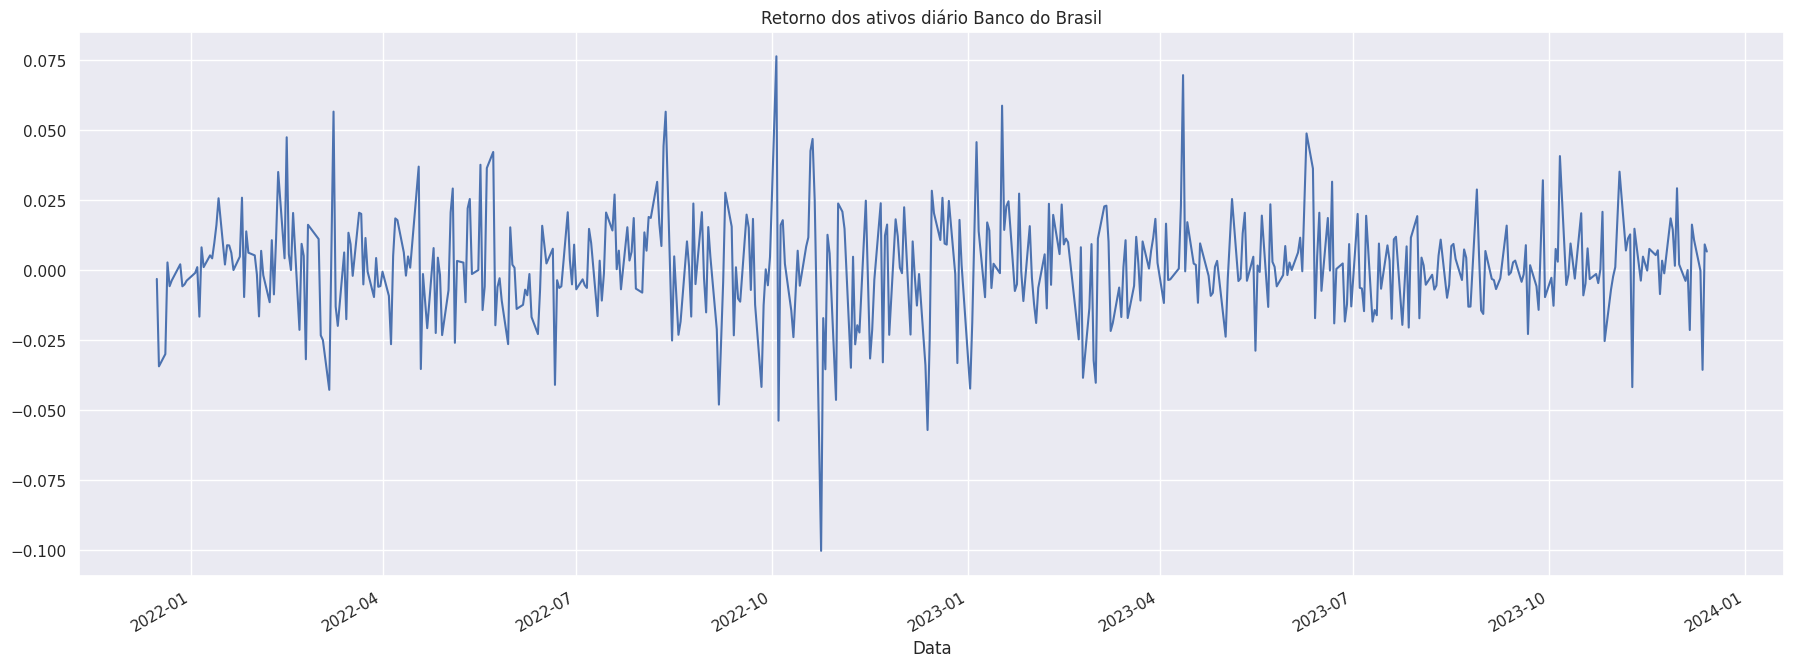

In [ ]:
retornos.plot(title = "Retorno dos ativos diário Banco do Brasil",subplots = False, figsize = (22, 8),xlabel='Data')
print("Média :",mi)
print("variancia :",mi)


## Realizando o teste Dickey-Fuller Aumentado para verificar estacionaridade


Uma série temporal é considerada “estacionária” se não tiver tendência,
apresentar variância constante ao longo do tempo e tiver uma estrutura de autocorrelação constante ao longo do tempo.


**H0:** A série temporal não é estacionária. Em outras palavras,
possui alguma estrutura dependente do tempo e não apresenta variação constante ao longo do tempo.

**HA:** A série temporal é estacionária.

Se o p-valor do teste for menor que algum nível de significância (por exemplo, α = 0,05),
então podemos rejeitar a hipótese nula e concluir que a série temporal é estacionária.

In [ ]:
Dickey_FullerA = adfuller(retornos)

print("teste T :" ,Dickey_FullerA[0])
print("P-valor :" ,Dickey_FullerA[1])

if Dickey_FullerA[1] <= 0.05 : print("rejeita a hipótese nula e conclui que a série temporal é estacionária")
else : print("Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária")


teste T : -21.272414289295792
P-valor : 0.0
rejeita a hipótese nula e conclui que a série temporal é estacionária


**Modelo de Série Temporal**

O comportamento de uma série pode ser representado por um modelo matemático.

Os modelos matemáticos mais comuns e que tem como premissa apresentar a estacionariedade são modelos auto-regressivos — AR(p), auto-regressivo e de média móvel ARMA(p,q) e modelo auto — regressivo integrado e de média móvel ARIMA(p,d,q).

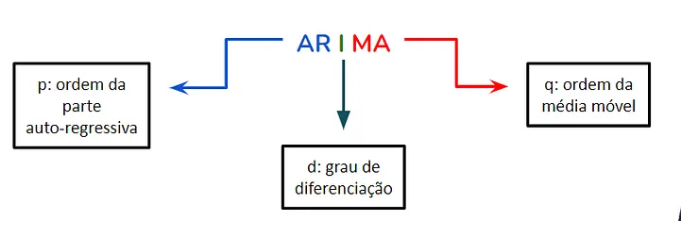

Fonte: https://medium.com/data-hackers/series-temporais-parte-1-a0e75a512e72

**Função de Autocorrelação (ACF)**

A função de autocorrelação mede o quão relacionados estão os valores da série em relação aos seus antecedentes, por exemplo, o quanto os dados estão relacionados com os meses anteriores. Assim, as barras que estão dentro dos limites azuis, apresentam correlação igual a zero e fora dessas barras significa que os dados estão correlacionados.

Essa função determina o parâmetro ‘q’ — médias móveis. Além disso, o primeiro termo da curva ACF é sempre 1 — os valores são sempre perfeitamente correlacionados consigo mesmo, pois um período está sempre relacionado com ele mesmo, já que é o próprio período.

**Função de Autocorrelação Parcial (PACF)**

Essa função mede a correlação entre duas observações seriais: yt e yt-k, eliminando-se a dependência dos termos intermediários. Ou seja, na função de autocorrelação parcial mede a correlação entre dois lags(períodos) diferente, já que a autocorrelação que mede isso entre todos os períodos.

Ela determina o parâmetro p- auto-regressivo. Número de autocorrelações parciais diferentes de zero fornece a ordem do modelo AR. Assim, as barras que estão dentro dos limites azuis apresentam correlação estatisticamente igual a zero. Barras que vão além dessas linhas indicam que os dados estão correlacionados.Por exemplo, na figura o p seria dois, pois, há duas barras fora dos limites azuis.



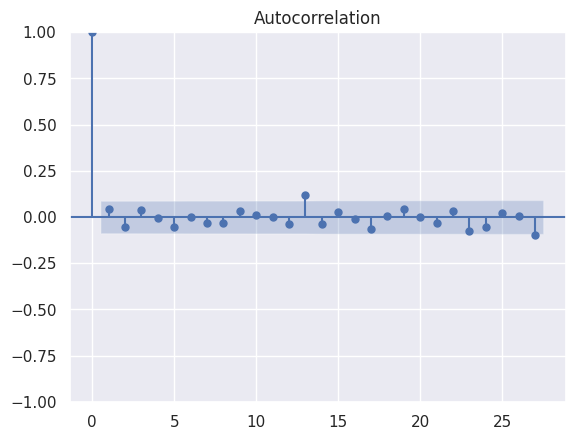

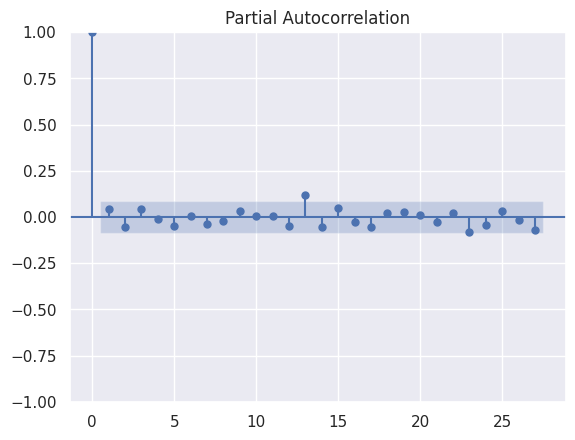

In [ ]:
# Plot the ACF and PACF of the data
plot_acf(retornos)
plot_pacf(retornos)
plt.show()

Temos então um Arima(0,0,0) que com média zero é ruído branco, o que significa que os erros não estão correlacionados ao longo do tempo .

Para os retornos do ativo, temo uma representação de ruido branco para esta série temporal, o que deixa muito complicado realizar qualquer tipo de modelagem.

Vamos agora então, buscar modelar os preços de fechamento.

In [ ]:
Dickey_FullerA = adfuller(Preco_fechamento)

print("teste T :" ,Dickey_FullerA[0])
print("P-valor :" ,Dickey_FullerA[1])

if Dickey_FullerA[1] <= 0.05 : print("rejeita a hipótese nula e conclui que a série temporal é estacionária")
else : print("Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária")

teste T : -0.79111748912145
P-valor : 0.8217173236090876
Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária


O teste de Dickey Fuller Aumentado nos dá fortes evidencias que a série é não estacionária. Vamos aplicar o Log para tentar contornar este problema.

**Logaritmo**
O logaritmo geralmente é usado para transformar séries que tem valores com crescimentos exponenciais em séries com crescimentos mais lineares, neste exemplo usaremos o Logaritmo Natural (LN), onde a base é 2,718, este tipo de logaritmo é bastante usado em modelos econômicos.

A diferença dos valores transformados em LN são aproximadamente equivalentes à variação percentual dos valores da série original, o que vale como base para redução da variância em séries com preços diferentes

fonte: https://medium.com/ensina-ai/princ%C3%ADpios-b%C3%A1sicos-para-criar-previs%C3%B5es-de-s%C3%A9ries-temporais-e58c451a25b

In [ ]:
log_preco =  np.log(Preco_fechamento)

<Axes: title={'center': 'Retorno do log do fechamento diário Banco do Brasil'}, xlabel='Data'>

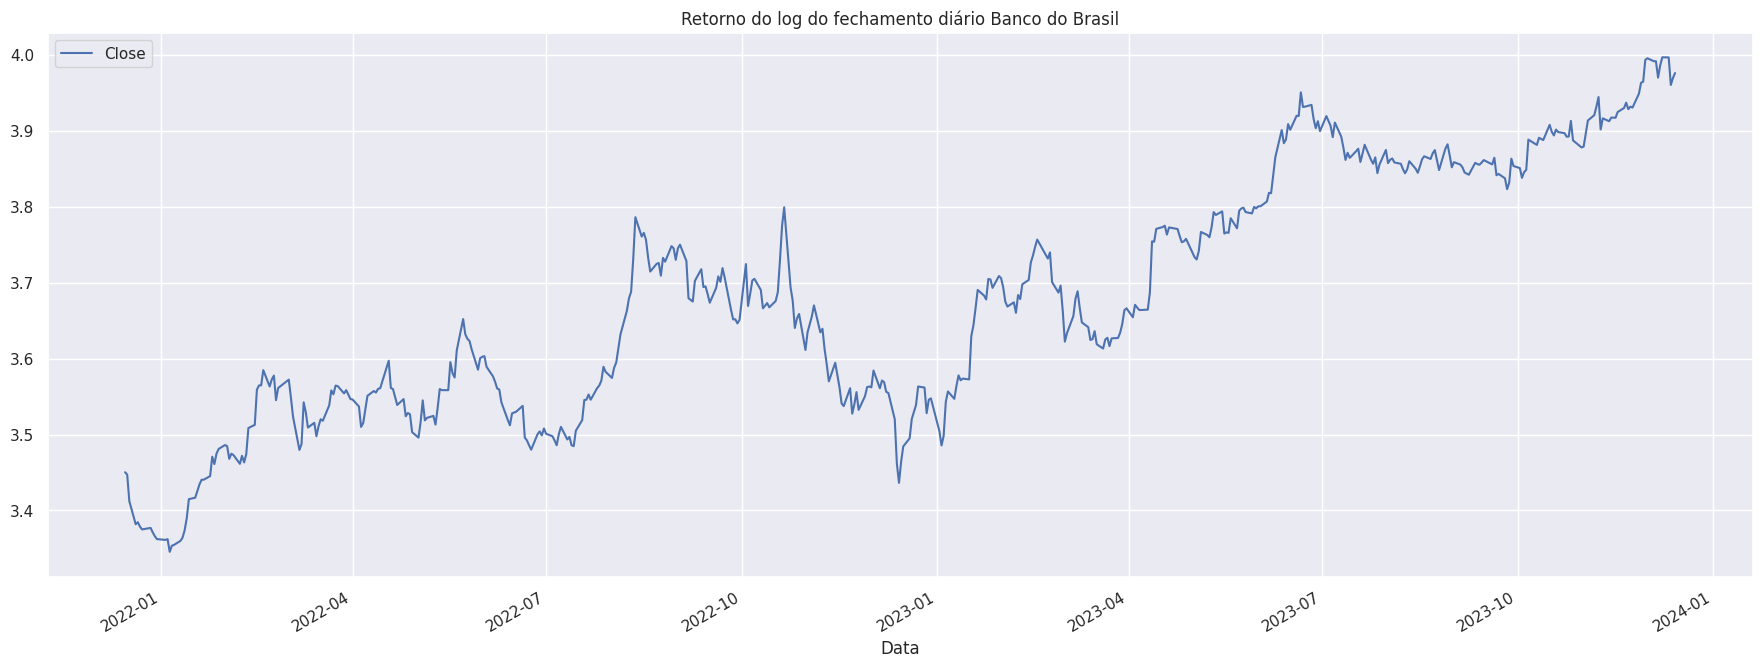

In [ ]:
log_preco.plot(title = "Retorno do log do fechamento diário Banco do Brasil",subplots = False, figsize = (22, 8),xlabel='Data')

In [ ]:
Dickey_FullerA = adfuller(log_preco)

print("teste T :" ,Dickey_FullerA[0])
print("P-valor :" ,Dickey_FullerA[1])

if Dickey_FullerA[1] <= 0.05 : print("rejeita a hipótese nula e conclui que a série temporal é estacionária")
else : print("Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária")

teste T : -1.005178931496564
P-valor : 0.7513707212343941
Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária


Como a Série ainda não se estacionarizou, iremos usar a técnica de diferenciação para buscar esta estacionariedade.

**Diferenciação**

A diferenciação é usada para remover os sinais de tendências e reduzir a variância, ela simplesmente é a diferença do valor do período T com o valor do período anterior T-1.

fonte: https://medium.com/ensina-ai/princ%C3%ADpios-b%C3%A1sicos-para-criar-previs%C3%B5es-de-s%C3%A9ries-temporais-e58c451a25b

In [ ]:
## primeira diferenciação

log_preco_diff = log_preco.diff(1).dropna()

<Axes: title={'center': 'Primeira Diferenciação do log do fechamento diário Banco do Brasil'}, xlabel='Data'>

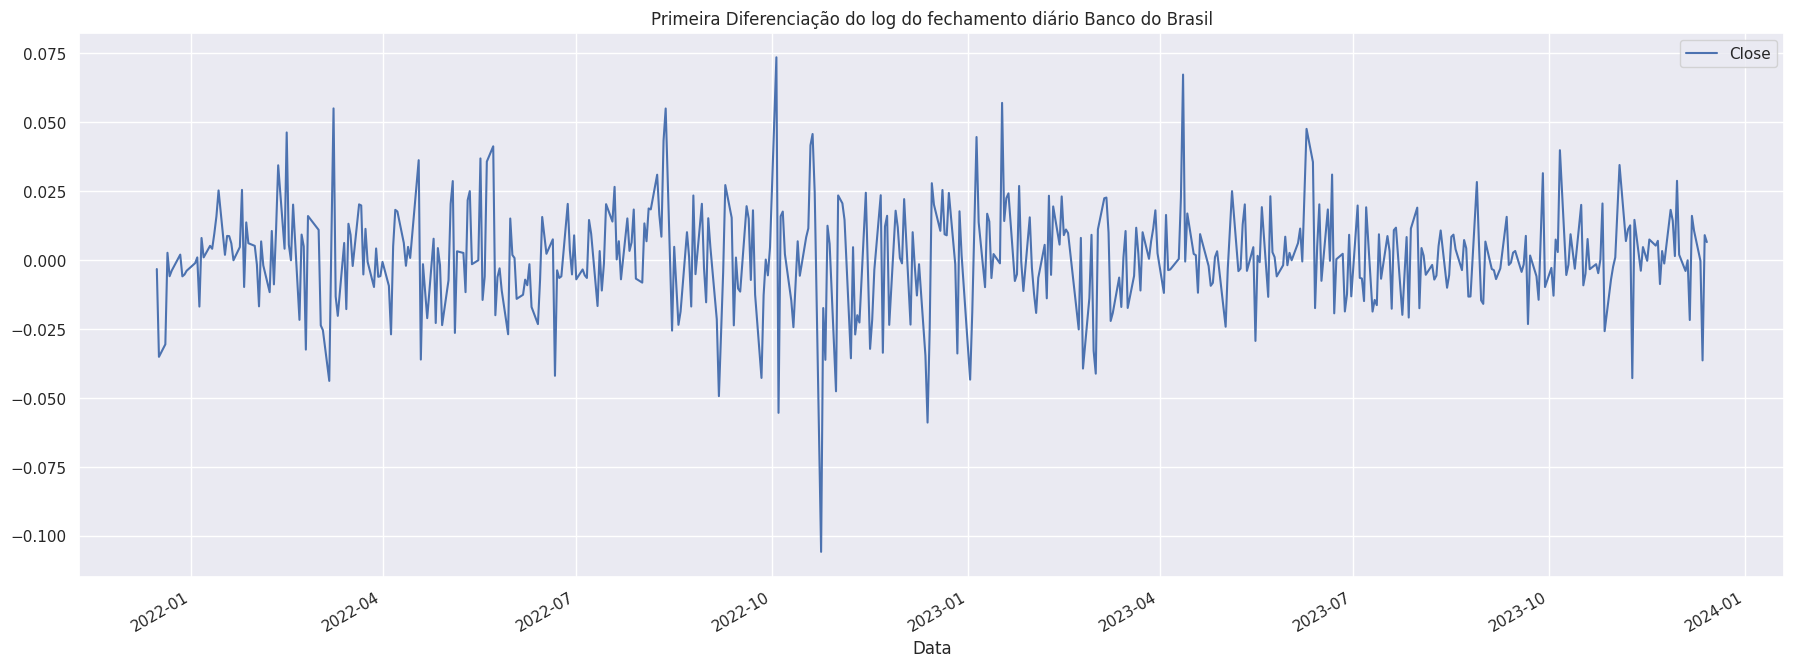

In [ ]:
log_preco_diff.plot(title = "Primeira Diferenciação do log do fechamento diário Banco do Brasil",subplots = False, figsize = (22, 8),xlabel='Data')

In [ ]:
Dickey_FullerA = adfuller(log_preco_diff)

print("teste T :" ,Dickey_FullerA[0])
print("P-valor :" ,Dickey_FullerA[1])

if Dickey_FullerA[1] <= 0.05 : print("rejeita a hipótese nula e conclui que a série temporal é estacionária")
else : print("Não rejeita a hipótese nula, conclui-se que a série temporal não é estacionária")

teste T : -21.290458032193968
P-valor : 0.0
rejeita a hipótese nula e conclui que a série temporal é estacionária


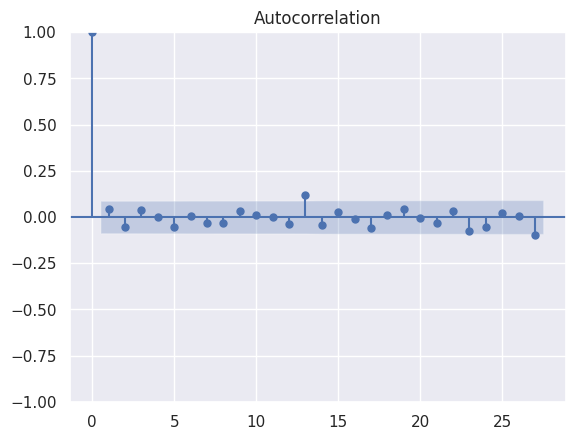

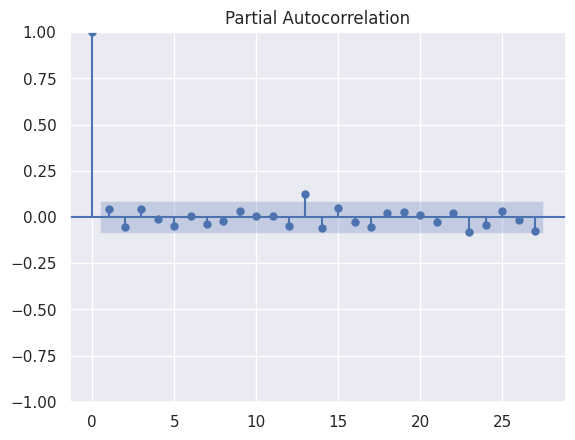

In [ ]:
# Plot the ACF and PACF of the data
plot_acf(log_preco_diff)
plot_pacf(log_preco_diff)
plt.show()